In [1]:
import pandas as pd
fifa = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/FIFA%202018%20Statistics.csv')
fifa.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [2]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)         # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook. 

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [4]:
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

!pip install plotly --upgrade

Requirement already up-to-date: plotly in c:\users\praviin.dudle\anaconda3\lib\site-packages (4.13.0)


In [5]:
# Install chart_studio, please use this command. 

!pip install chart-studio

In [6]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

In [7]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    128 non-null    object 
 1   Team                    128 non-null    object 
 2   Opponent                128 non-null    object 
 3   Goal Scored             128 non-null    int64  
 4   Ball Possession %       128 non-null    int64  
 5   Attempts                128 non-null    int64  
 6   On-Target               128 non-null    int64  
 7   Off-Target              128 non-null    int64  
 8   Blocked                 128 non-null    int64  
 9   Corners                 128 non-null    int64  
 10  Offsides                128 non-null    int64  
 11  Free Kicks              128 non-null    int64  
 12  Saves                   128 non-null    int64  
 13  Pass Accuracy %         128 non-null    int64  
 14  Passes                  128 non-null    in

In [8]:
fifa.shape

(128, 27)

In [9]:
fifa.columns

Index(['Date', 'Team', 'Opponent', 'Goal Scored', 'Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes',
       'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card',
       'Yellow & Red', 'Red', 'Man of the Match', '1st Goal', 'Round', 'PSO',
       'Goals in PSO', 'Own goals', 'Own goal Time'],
      dtype='object')

In [10]:
import datetime as dt

In [11]:
# To install pandas profiling please run this command.

!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in c:\users\praviin.dudle\anaconda3\lib\site-packages (2.9.0)


In [12]:
import pandas_profiling 

In [13]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

profile = fifa.profile_report(title='Pandas FIFA Profiling before Data Preprocessing')
profile.to_file(output_file="FIFA profiling_before_preprocessing.html")

In [14]:
fifa['1st Goal'] = fifa['1st Goal'].fillna(0)

In [15]:
fifa['Own goals'] = fifa['Own goals'].fillna(0)

In [16]:
fifa['Own goal Time'] = fifa['Own goal Time'].fillna(0)

In [17]:
fifa['Date'] = pd.to_datetime(fifa['Date'], format='%d-%m-%Y') 

In [18]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    128 non-null    datetime64[ns]
 1   Team                    128 non-null    object        
 2   Opponent                128 non-null    object        
 3   Goal Scored             128 non-null    int64         
 4   Ball Possession %       128 non-null    int64         
 5   Attempts                128 non-null    int64         
 6   On-Target               128 non-null    int64         
 7   Off-Target              128 non-null    int64         
 8   Blocked                 128 non-null    int64         
 9   Corners                 128 non-null    int64         
 10  Offsides                128 non-null    int64         
 11  Free Kicks              128 non-null    int64         
 12  Saves                   128 non-null    int64     

In [19]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_after_preprocessing.html

profile = fifa.profile_report(title='Pandas FIFA Profiling after Data Preprocessing')
profile.to_file(output_file="FIFA profiling_after_preprocessing.html")

No     64
Yes    64
Name: Man of the Match, dtype: int64

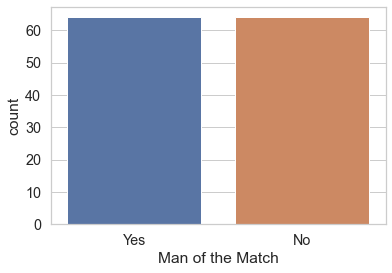

In [20]:
sns.countplot(x = "Man of the Match", data = fifa)
fifa.loc[:, 'Man of the Match'].value_counts()

<AxesSubplot:>

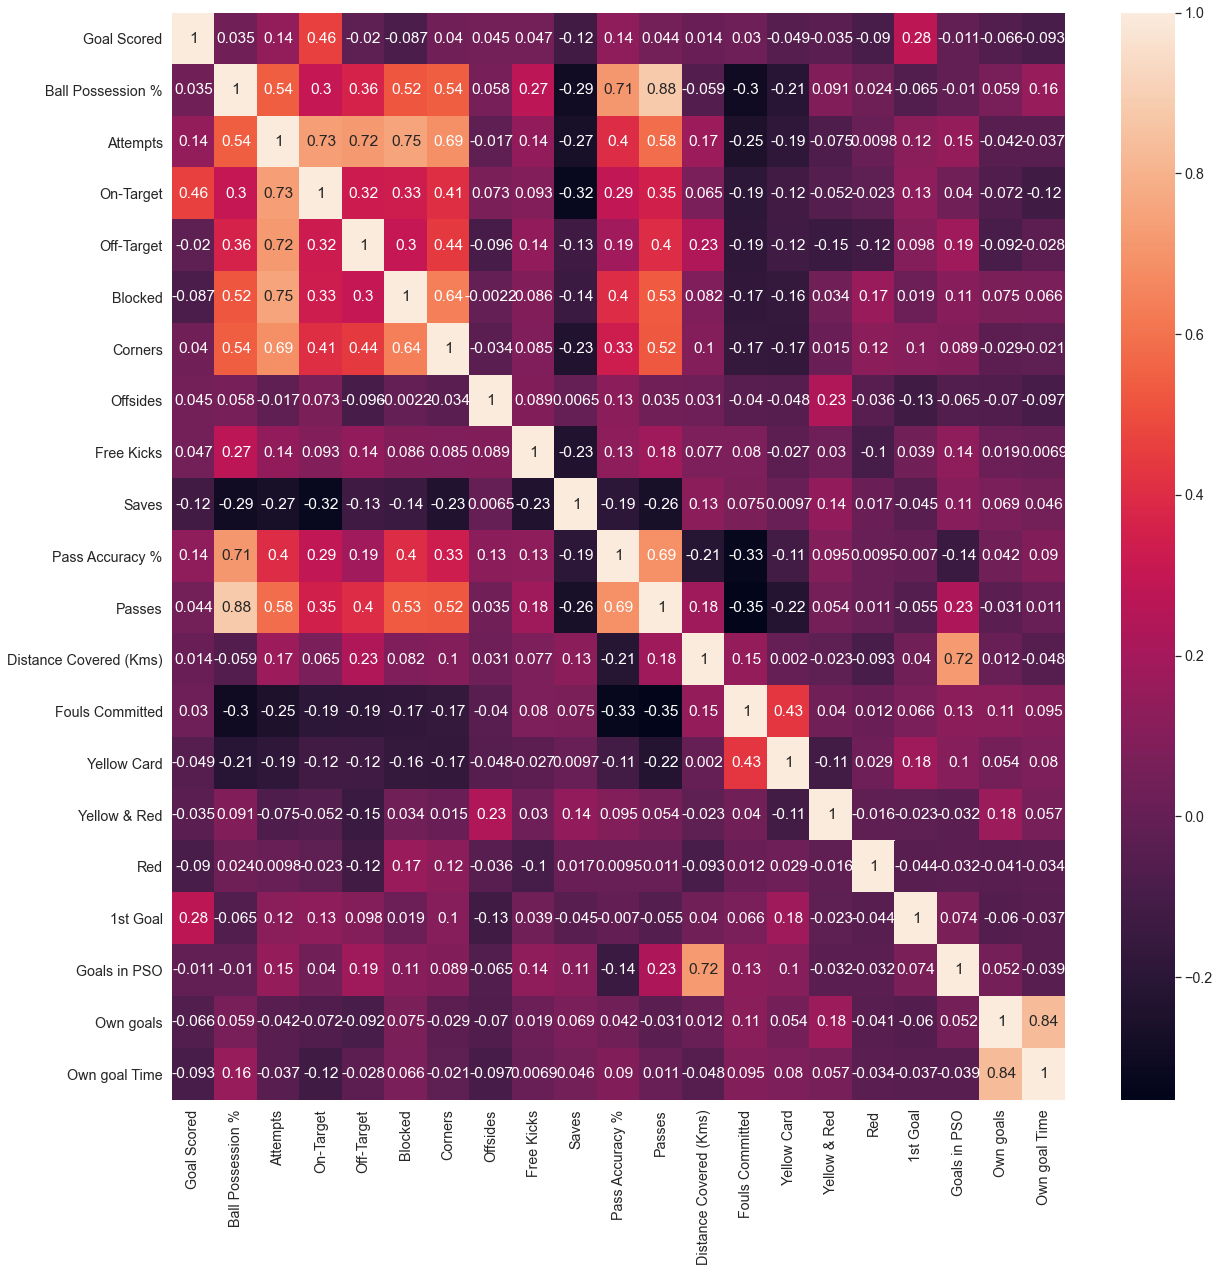

In [21]:
plt.figure(figsize =(20,20))
Corr=fifa[fifa.columns].corr()
sns.heatmap(Corr,annot=True)

3     31
4     22
2     18
5     14
7     11
1     11
6     10
9      4
0      4
12     1
10     1
8      1
Name: On-Target, dtype: int64

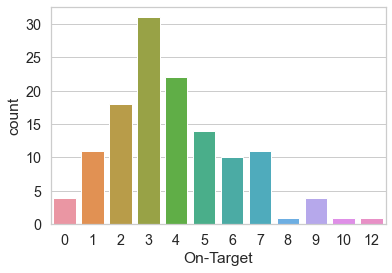

In [22]:
sns.countplot(x = "On-Target", data = fifa)
fifa.loc[:, 'On-Target'].value_counts()

5     24
6     20
4     17
3     15
7     14
8      9
2      8
1      8
10     5
9      5
11     3
Name: Off-Target, dtype: int64

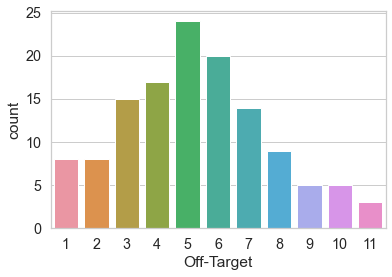

In [23]:
sns.countplot(x = "Off-Target", data = fifa)
fifa.loc[:, 'Off-Target'].value_counts()

In [24]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    128 non-null    datetime64[ns]
 1   Team                    128 non-null    object        
 2   Opponent                128 non-null    object        
 3   Goal Scored             128 non-null    int64         
 4   Ball Possession %       128 non-null    int64         
 5   Attempts                128 non-null    int64         
 6   On-Target               128 non-null    int64         
 7   Off-Target              128 non-null    int64         
 8   Blocked                 128 non-null    int64         
 9   Corners                 128 non-null    int64         
 10  Offsides                128 non-null    int64         
 11  Free Kicks              128 non-null    int64         
 12  Saves                   128 non-null    int64     

In [25]:
#var = ['Man of the Match', 'Goal Scored', 'On-Target', 'Corners', 'Attempts', 'Free Kicks', 'Yellow Card', 'Red', 'Fouls Committed', 'Own goal Time']
#corr = fifa.corr()
#corr = corr.filter(items = ['Man of the Match'])
#plt.figure(figsize=(15,8))
#sns.heatmap(corr, annot=True)

<AxesSubplot:>

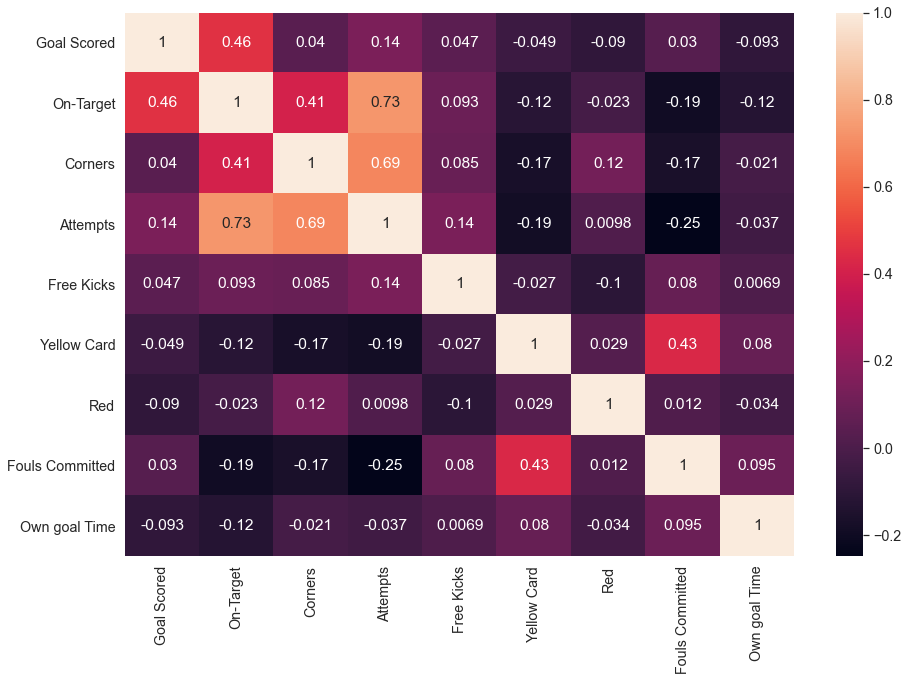

In [26]:
var = ['Goal Scored', 'On-Target', 'Corners', 'Attempts', 'Free Kicks', 'Yellow Card', 'Red', 
       'Fouls Committed', 'Own goal Time']
plt.figure(figsize=(15,10))
sns.heatmap((fifa[var].corr()), annot=True)

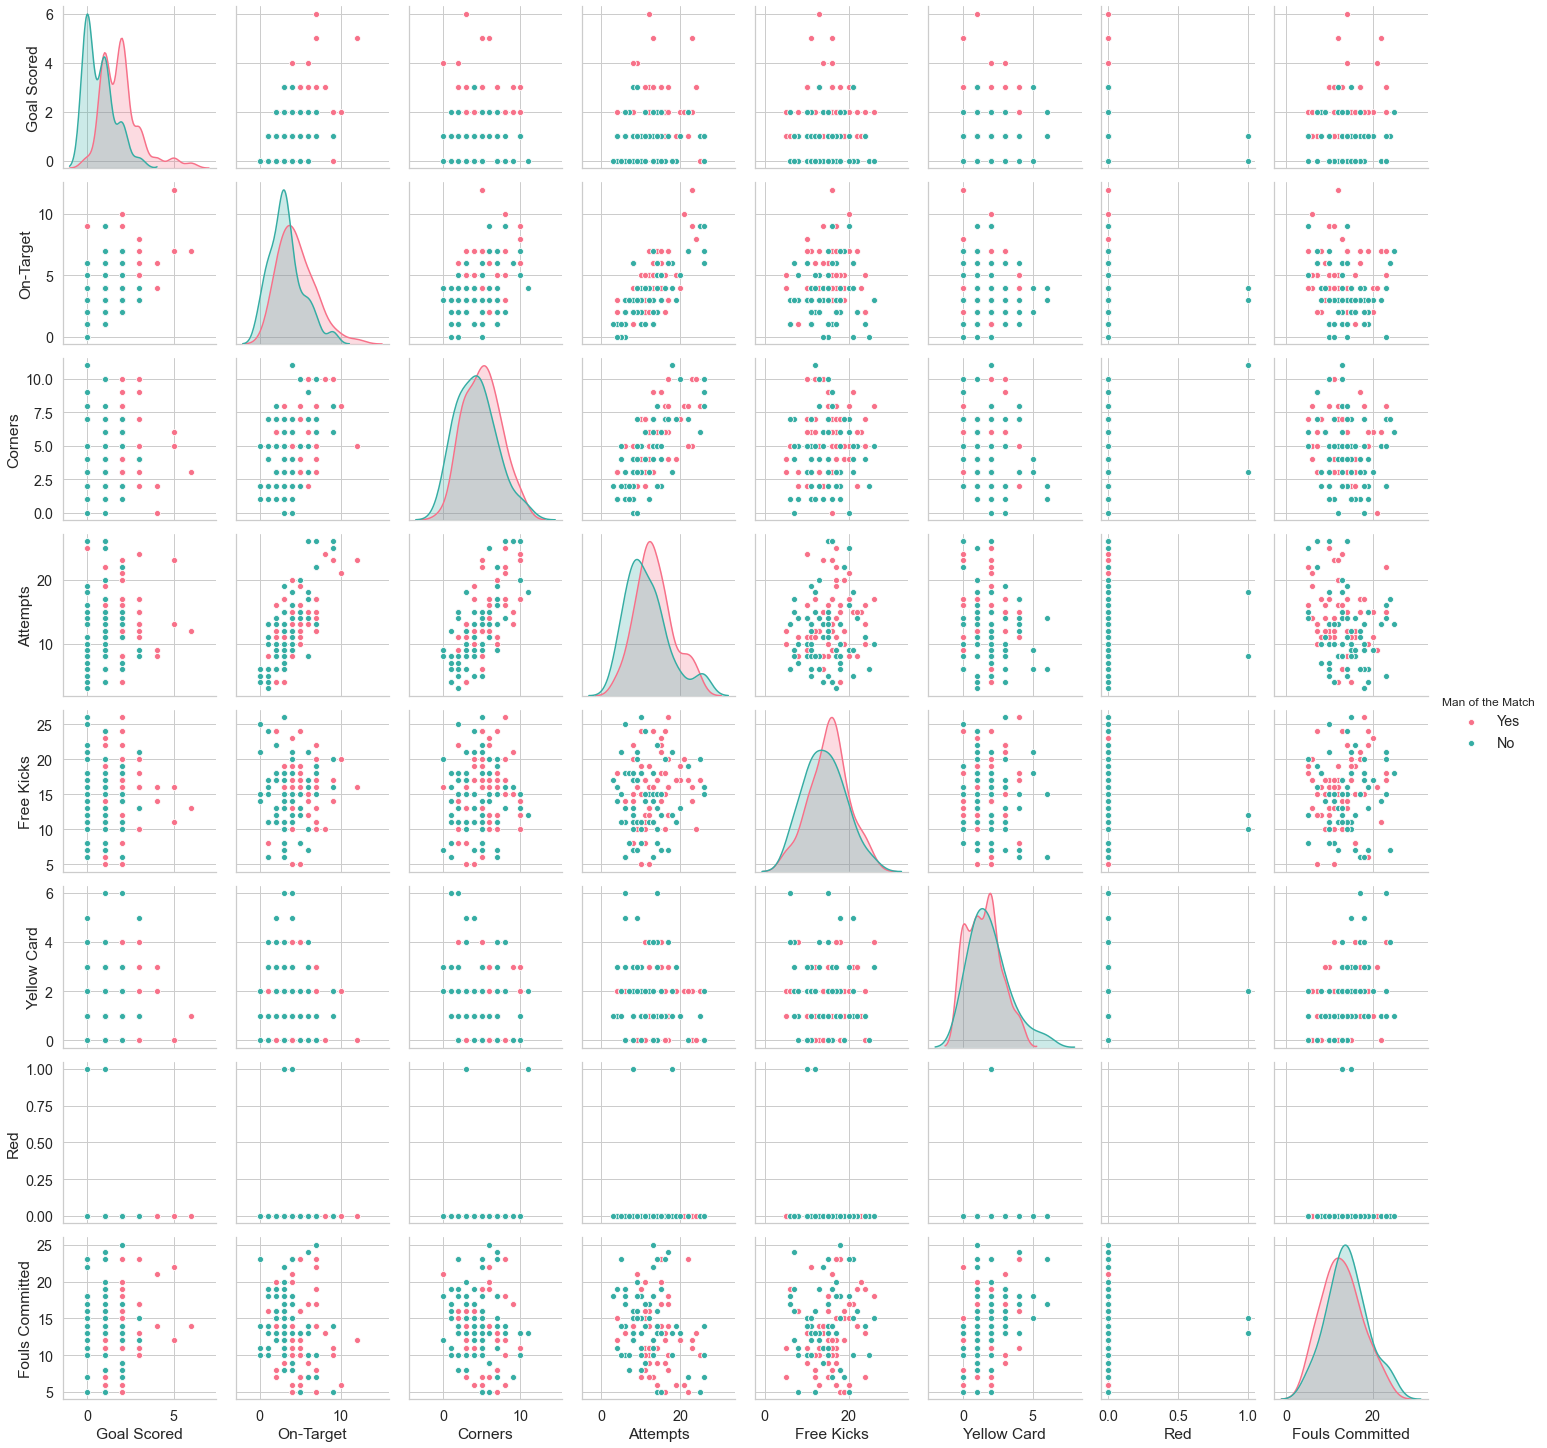

In [27]:
var1 = ['Goal Scored', 'On-Target', 'Corners', 'Attempts', 'Free Kicks', 'Yellow Card', 'Red', 'Fouls Committed']
var1.append('Man of the Match')
sns.pairplot(fifa[var1], hue = 'Man of the Match', palette="husl")
plt.show()

In [28]:
numerical_features   = fifa.select_dtypes(include = [np.number]).columns
categorical_features = fifa.select_dtypes(include = [np.object]).columns #['Team', 'Opponent','Round', 'PSO', 'Man of the Match']

In [29]:
numerical_features

Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red', '1st Goal',
       'Goals in PSO', 'Own goals', 'Own goal Time'],
      dtype='object')

In [30]:
categorical_features

Index(['Team', 'Opponent', 'Man of the Match', 'Round', 'PSO'], dtype='object')

In [31]:
categorical_features_df = fifa[categorical_features]
categorical_features_df

,Team,Opponent,Man of the Match,Round,PSO
0,Russia,Saudi Arabia,Yes,Group Stage,No
1,Saudi Arabia,Russia,No,Group Stage,No
2,Egypt,Uruguay,No,Group Stage,No
3,Uruguay,Egypt,Yes,Group Stage,No
4,Morocco,Iran,No,Group Stage,No
...,...,...,...,...,...
123,England,Croatia,No,Semi- Finals,No
124,Belgium,England,Yes,3rd Place,No
125,England,Belgium,No,3rd Place,No
126,France,Croatia,Yes,Final,No


In [32]:
numerical_features_df = fifa[numerical_features]
numerical_features_df

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,12.0,0,0.0,0.0
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,0.0,0,0.0,0.0
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,0.0,0,0.0,0.0
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,89.0,0,0.0,0.0
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,0.0,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0,5.0,0,0.0,0.0
124,2,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0,0,4.0,0,0.0,0.0
125,0,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0,0,0.0,0,0.0,0.0
126,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0,18.0,0,1.0,18.0


In [33]:
outcome_name = ['Man of the Match']
outcome_label = fifa[outcome_name]
outcome_label

,Man of the Match
0,Yes
1,No
2,No
3,Yes
4,No
...,...
123,No
124,Yes
125,No
126,Yes


In [34]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(fifa[numerical_features])
fifa[numerical_features] = ss.transform(fifa[numerical_features])
fifa

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,2018-06-14,Russia,Saudi Arabia,3.194193,-0.960492,0.077747,1.386528,-0.947169,-0.150128,0.525857,1.393290,-0.826777,-1.335617,-0.770604,-1.040200,0.968590,1.837216,-1.284069,-0.125988,-0.125988,Yes,-0.624200,Group Stage,No,-0.252677,-0.321634,-0.268708
1,2018-06-14,Saudi Arabia,Russia,-1.146112,0.961994,-1.261890,-1.758609,-0.947169,-0.150128,-1.115843,-0.289173,2.148293,-0.355909,0.582910,0.321071,-0.142184,-0.770884,-1.284069,-0.125988,-0.125988,No,-1.065419,Group Stage,No,-0.252677,-0.321634,-0.268708
2,2018-06-15,Egypt,Uruguay,-1.146112,-0.672119,-0.879137,-0.410693,-0.947169,-0.567876,-1.936693,-0.289173,-1.676797,0.133944,-0.770604,-0.449209,0.455925,-0.336200,0.230777,-0.125988,-0.125988,No,-1.065419,Group Stage,No,-0.252677,-0.321634,-0.268708
3,2018-06-15,Uruguay,Egypt,-0.278051,0.673621,0.269124,0.038612,0.302704,0.267620,0.115432,-0.289173,-0.401767,0.133944,0.582910,0.839018,0.370481,-1.640250,-1.284069,-0.125988,-0.125988,Yes,2.206961,Group Stage,No,-0.252677,-0.321634,-0.268708
4,2018-06-15,Morocco,Iran,-1.146112,1.346491,0.077747,-0.410693,0.302704,0.267620,0.115432,-1.130405,-0.189262,-0.355909,0.582910,-0.196876,-0.483961,1.837216,-0.526646,-0.125988,-0.125988,No,-1.065419,Group Stage,No,-0.252677,3.109126,5.359495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,2018-07-11,England,Croatia,-0.278051,-0.383746,-0.305007,-1.309304,0.302704,0.267620,-0.294993,1.393290,1.935788,1.113652,-0.601415,0.108580,3.531914,0.098483,-0.526646,-0.125988,-0.125988,No,-0.881578,Semi- Finals,No,-0.252677,-0.321634,-0.268708
124,2018-07-14,Belgium,England,0.590010,-0.672119,-0.113630,0.038612,-0.947169,0.685367,-0.294993,-0.289173,-2.101807,1.113652,0.921288,0.314431,0.114148,-0.553542,-0.526646,-0.125988,-0.125988,Yes,-0.918346,3rd Place,No,-0.252677,-0.321634,-0.268708
125,2018-07-14,England,Belgium,-1.146112,0.673621,0.460500,0.487918,0.719328,-0.150128,0.115432,-1.130405,-0.614272,-0.355909,1.598045,1.562816,0.285036,-1.857592,0.230777,-0.125988,-0.125988,No,-1.065419,3rd Place,No,-0.252677,-0.321634,-0.268708
126,2018-07-15,France,Croatia,2.326132,-1.056616,-0.879137,0.937223,-1.780418,-0.985624,-1.115843,-0.289173,-0.189262,-0.845763,-1.278172,-1.272612,-0.654849,0.098483,0.230777,-0.125988,-0.125988,Yes,-0.403590,Final,No,-0.252677,3.109126,0.856933


In [35]:
# Treat Categorical data with One Hot Encoding method
fifa = pd.get_dummies(fifa, columns = categorical_features)
fifa

,Date,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time,Team_Argentina,Team_Australia,Team_Belgium,...,Opponent_Morocco,Opponent_Nigeria,Opponent_Panama,Opponent_Peru,Opponent_Poland,Opponent_Portugal,Opponent_Russia,Opponent_Saudi Arabia,Opponent_Senegal,Opponent_Serbia,Opponent_Spain,Opponent_Sweden,Opponent_Switzerland,Opponent_Tunisia,Opponent_Uruguay,Man of the Match_No,Man of the Match_Yes,Round_3rd Place,Round_Final,Round_Group Stage,Round_Quarter Finals,Round_Round of 16,Round_Semi- Finals,PSO_No,PSO_Yes
0,2018-06-14,3.194193,-0.960492,0.077747,1.386528,-0.947169,-0.150128,0.525857,1.393290,-0.826777,-1.335617,-0.770604,-1.040200,0.968590,1.837216,-1.284069,-0.125988,-0.125988,-0.624200,-0.252677,-0.321634,-0.268708,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
1,2018-06-14,-1.146112,0.961994,-1.261890,-1.758609,-0.947169,-0.150128,-1.115843,-0.289173,2.148293,-0.355909,0.582910,0.321071,-0.142184,-0.770884,-1.284069,-0.125988,-0.125988,-1.065419,-0.252677,-0.321634,-0.268708,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,2018-06-15,-1.146112,-0.672119,-0.879137,-0.410693,-0.947169,-0.567876,-1.936693,-0.289173,-1.676797,0.133944,-0.770604,-0.449209,0.455925,-0.336200,0.230777,-0.125988,-0.125988,-1.065419,-0.252677,-0.321634,-0.268708,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0
3,2018-06-15,-0.278051,0.673621,0.269124,0.038612,0.302704,0.267620,0.115432,-0.289173,-0.401767,0.133944,0.582910,0.839018,0.370481,-1.640250,-1.284069,-0.125988,-0.125988,2.206961,-0.252677,-0.321634,-0.268708,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,2018-06-15,-1.146112,1.346491,0.077747,-0.410693,0.302704,0.267620,0.115432,-1.130405,-0.189262,-0.355909,0.582910,-0.196876,-0.483961,1.837216,-0.526646,-0.125988,-0.125988,-1.065419,-0.252677,3.109126,5.359495,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,2018-07-11,-0.278051,-0.383746,-0.305007,-1.309304,0.302704,0.267620,-0.294993,1.393290,1.935788,1.113652,-0.601415,0.108580,3.531914,0.098483,-0.526646,-0.125988,-0.125988,-0.881578,-0.252677,-0.321634,-0.268708,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
124,2018-07-14,0.590010,-0.672119,-0.113630,0.038612,-0.947169,0.685367,-0.294993,-0.289173,-2.101807,1.113652,0.921288,0.314431,0.114148,-0.553542,-0.526646,-0.125988,-0.125988,-0.918346,-0.252677,-0.321634,-0.268708,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
125,2018-07-14,-1.146112,0.673621,0.460500,0.487918,0.719328,-0.150128,0.115432,-1.130405,-0.614272,-0.355909,1.598045,1.562816,0.285036,-1.857592,0.230777,-0.125988,-0.125988,-1.065419,-0.252677,-0.321634,-0.268708,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
126,2018-07-15,2.326132,-1.056616,-0.879137,0.937223,-1.780418,-0.985624,-1.115843,-0.289173,-0.189262,-0.845763,-1.278172,-1.272612,-0.654849,0.098483,0.230777,-0.125988,-0.125988,-0.403590,-0.252677,3.109126,0.856933,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [36]:
fifa_training_features = list(set(fifa)-set(outcome_name))
#fifa_training_features

In [37]:
fifa = fifa.drop(columns= ['Date'])

In [38]:
fifa.head()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time,Team_Argentina,Team_Australia,Team_Belgium,Team_Brazil,...,Opponent_Morocco,Opponent_Nigeria,Opponent_Panama,Opponent_Peru,Opponent_Poland,Opponent_Portugal,Opponent_Russia,Opponent_Saudi Arabia,Opponent_Senegal,Opponent_Serbia,Opponent_Spain,Opponent_Sweden,Opponent_Switzerland,Opponent_Tunisia,Opponent_Uruguay,Man of the Match_No,Man of the Match_Yes,Round_3rd Place,Round_Final,Round_Group Stage,Round_Quarter Finals,Round_Round of 16,Round_Semi- Finals,PSO_No,PSO_Yes
0,3.194193,-0.960492,0.077747,1.386528,-0.947169,-0.150128,0.525857,1.393290,-0.826777,-1.335617,-0.770604,-1.040200,0.968590,1.837216,-1.284069,-0.125988,-0.125988,-0.624200,-0.252677,-0.321634,-0.268708,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
1,-1.146112,0.961994,-1.261890,-1.758609,-0.947169,-0.150128,-1.115843,-0.289173,2.148293,-0.355909,0.582910,0.321071,-0.142184,-0.770884,-1.284069,-0.125988,-0.125988,-1.065419,-0.252677,-0.321634,-0.268708,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,-1.146112,-0.672119,-0.879137,-0.410693,-0.947169,-0.567876,-1.936693,-0.289173,-1.676797,0.133944,-0.770604,-0.449209,0.455925,-0.336200,0.230777,-0.125988,-0.125988,-1.065419,-0.252677,-0.321634,-0.268708,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0
3,-0.278051,0.673621,0.269124,0.038612,0.302704,0.267620,0.115432,-0.289173,-0.401767,0.133944,0.582910,0.839018,0.370481,-1.640250,-1.284069,-0.125988,-0.125988,2.206961,-0.252677,-0.321634,-0.268708,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,-1.146112,1.346491,0.077747,-0.410693,0.302704,0.267620,0.115432,-1.130405,-0.189262,-0.355909,0.582910,-0.196876,-0.483961,1.837216,-0.526646,-0.125988,-0.125988,-1.065419,-0.252677,3.109126,5.359495,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [39]:
#import datetime as dt
#X_test.columns = ["Date"]
#X_test['Date'] = pd.to_datetime(X_test['Date'])
#X_test['Date']=X_test['Date'].map(dt.datetime.toordinal)

In [40]:
# Preparing data to slip into train and test.
X=fifa.drop(columns=['Man of the Match_Yes'])
y=fifa['Man of the Match_Yes']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [42]:
X_test.head()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time,Team_Argentina,Team_Australia,Team_Belgium,Team_Brazil,...,Opponent_Mexico,Opponent_Morocco,Opponent_Nigeria,Opponent_Panama,Opponent_Peru,Opponent_Poland,Opponent_Portugal,Opponent_Russia,Opponent_Saudi Arabia,Opponent_Senegal,Opponent_Serbia,Opponent_Spain,Opponent_Sweden,Opponent_Switzerland,Opponent_Tunisia,Opponent_Uruguay,Man of the Match_No,Round_3rd Place,Round_Final,Round_Group Stage,Round_Quarter Finals,Round_Round of 16,Round_Semi- Finals,PSO_No,PSO_Yes
121,-1.146112,0.961994,-0.687760,-0.410693,-0.113921,-0.985624,0.115432,-0.289173,-1.676797,0.623798,1.259667,1.104632,-0.398517,0.533166,0.988200,-0.125988,-0.125988,-1.065419,-0.252677,-0.321634,-0.268708,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
104,0.590010,-0.287622,1.608761,2.734445,0.719328,0.267620,1.346707,-1.130405,1.085768,-0.845763,0.075342,-0.429288,-1.252958,-1.640250,0.230777,-0.125988,-0.125988,0.809765,-0.252677,-0.321634,-0.268708,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
55,0.590010,0.865870,0.077747,0.487918,0.302704,-0.567876,0.115432,-1.130405,1.935788,1.113652,1.090477,0.148422,-0.825738,-1.422908,-1.284069,-0.125988,-0.125988,-0.109443,-0.252677,-0.321634,-0.268708,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
56,0.590010,2.019361,0.651877,0.487918,-0.530545,1.520863,1.346707,3.075754,0.023243,1.113652,1.428856,1.569456,0.370481,-0.336200,-1.284069,7.937254,-0.125988,0.699460,-0.252677,-0.321634,-0.268708,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
33,-0.278051,0.289124,0.077747,-1.309304,1.135952,0.267620,-0.294993,-1.130405,-0.826777,-0.845763,-0.263036,-0.163674,0.285036,-0.770884,-0.526646,-0.125988,-0.125988,0.662691,-0.252677,3.109126,2.670465,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [43]:
print(X_train.shape)
print(y_train.shape)

(102, 94)
(102,)


In [44]:
print(X_test.shape)
print(y_test.shape)

(26, 94)
(26,)


In [45]:
### LINEAR REGRESSION

In [46]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
regressor.intercept_

1.0315652287749866

In [48]:
regressor.coef_

array([-7.94820291e-17, -1.60982339e-15,  2.02615702e-15, -6.10622664e-16,
       -2.77555756e-16, -1.02001740e-15, -2.49800181e-16, -1.38777878e-16,
        2.77555756e-16,  3.53883589e-16,  2.22044605e-16,  6.59194921e-16,
        5.96744876e-16,  1.94289029e-16, -1.73472348e-16, -2.42861287e-16,
       -1.38777878e-16,  9.71445147e-17, -1.72344777e-15, -1.94289029e-16,
        3.46944695e-16, -2.92883314e-02, -2.92883314e-02, -2.92883314e-02,
       -2.92883314e-02, -2.92883314e-02, -2.92883314e-02, -2.92883314e-02,
       -2.92883314e-02, -4.11366261e-02, -2.92883314e-02, -2.92883314e-02,
       -2.92883314e-02, -2.92883314e-02, -2.92883314e-02, -2.92883314e-02,
       -2.92883314e-02, -2.92883314e-02, -2.92883314e-02, -2.92883314e-02,
       -2.92883314e-02, -2.92883314e-02, -2.92883314e-02, -2.92883314e-02,
       -2.92883314e-02, -2.92883314e-02, -2.92883314e-02, -2.92883314e-02,
       -2.92883314e-02, -2.92883314e-02, -2.92883314e-02, -2.92883314e-02,
       -2.92883314e-02, -

In [49]:
feature_cols = list(X_test)

In [50]:
feature_cols

['Goal Scored',
 'Ball Possession %',
 'Attempts',
 'On-Target',
 'Off-Target',
 'Blocked',
 'Corners',
 'Offsides',
 'Free Kicks',
 'Saves',
 'Pass Accuracy %',
 'Passes',
 'Distance Covered (Kms)',
 'Fouls Committed',
 'Yellow Card',
 'Yellow & Red',
 'Red',
 '1st Goal',
 'Goals in PSO',
 'Own goals',
 'Own goal Time',
 'Team_Argentina',
 'Team_Australia',
 'Team_Belgium',
 'Team_Brazil',
 'Team_Colombia',
 'Team_Costa Rica',
 'Team_Croatia',
 'Team_Denmark',
 'Team_Egypt',
 'Team_England',
 'Team_France',
 'Team_Germany',
 'Team_Iceland',
 'Team_Iran',
 'Team_Japan',
 'Team_Korea Republic',
 'Team_Mexico',
 'Team_Morocco',
 'Team_Nigeria',
 'Team_Panama',
 'Team_Peru',
 'Team_Poland',
 'Team_Portugal',
 'Team_Russia',
 'Team_Saudi Arabia',
 'Team_Senegal',
 'Team_Serbia',
 'Team_Spain',
 'Team_Sweden',
 'Team_Switzerland',
 'Team_Tunisia',
 'Team_Uruguay',
 'Opponent_Argentina',
 'Opponent_Australia',
 'Opponent_Belgium',
 'Opponent_Brazil',
 'Opponent_Colombia',
 'Opponent_Costa Ri

In [51]:
feature_cols.insert(0, 'Intercept')

In [52]:
coef = regressor.coef_.tolist()

In [53]:
coef.insert(0, regressor.intercept_)

In [54]:
eq1 = zip(feature_cols, coef)
for c1,c2 in eq1:
    print(c1,c2)

Intercept 1.0315652287749866
Goal Scored -7.9482029084097e-17
Ball Possession % -1.609823385706477e-15
Attempts 2.0261570199409107e-15
On-Target -6.106226635438361e-16
Off-Target -2.7755575615628914e-16
Blocked -1.0200174038743626e-15
Corners -2.498001805406602e-16
Offsides -1.3877787807814457e-16
Free Kicks 2.7755575615628914e-16
Saves 3.5388358909926865e-16
Pass Accuracy % 2.220446049250313e-16
Passes 6.591949208711867e-16
Distance Covered (Kms) 5.967448757360216e-16
Fouls Committed 1.942890293094024e-16
Yellow Card -1.734723475976807e-16
Yellow & Red -2.42861286636753e-16
Red -1.3877787807814457e-16
1st Goal 9.71445146547012e-17
Goals in PSO -1.7234477733829578e-15
Own goals -1.942890293094024e-16
Own goal Time 3.469446951953614e-16
Team_Argentina -0.02928833143004895
Team_Australia -0.029288331430052567
Team_Belgium -0.029288331430053646
Team_Brazil -0.029288331430052408
Team_Colombia -0.02928833143005435
Team_Costa Rica -0.029288331430054385
Team_Croatia -0.02928833143005008
Team_

In [55]:
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

In [56]:
import sklearn.metrics as metrics

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
from sklearn.metrics import mean_absolute_error
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [59]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 8.087212816632268e-16
MAE for test set is 0.0013671109275314624


In [60]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [61]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 1.0802125661413335e-30
MSE for test set is 1.6197933164142666e-05


In [62]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [63]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 1.0393327504420003e-15
RMSE for test set is 0.004024665596561118


In [64]:
from sklearn.metrics import r2_score
r2_score_train = r2_score(y_train, y_pred_train)
r2_score_test = r2_score(y_test, y_pred_test)

In [65]:
r2_score_train

1.0

In [66]:
r2_score_test

0.9999352082673434

In [67]:
yhat = regressor.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

1.0 1.0


In [68]:
yhat = regressor.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.9999352082673434 1.0000234752654553


In [69]:
### LOGISTIC REGRESSION

In [70]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
y_pred_train = logreg.predict(X_train)  

In [72]:
y_pred_test = logreg.predict(X_test)                                                   # make predictions on the testing set

In [73]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train))

Accuracy score for train data is: 1.0


In [74]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.9615384615384616


In [75]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

print(confusion_matrix)

    0   1
0  12   1
1   0  13


In [76]:
confusion_matrix.index = ['MOM_Yes_Actual','MOM_No_Actual']
confusion_matrix.columns = ['Predicted MOM_Yes','Predicted MOM_No']
print(confusion_matrix)

                Predicted MOM_Yes  Predicted MOM_No
MOM_Yes_Actual                 12                 1
MOM_No_Actual                   0                13


In [77]:
preds1 = np.where(logreg.predict_proba(X_test)[:,1]> 0.75,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds1))

Accuracy score for test data is: 1.0


In [78]:
preds2 = np.where(logreg.predict_proba(X_test)[:,1]> 0.25,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds2))

Accuracy score for test data is: 0.9615384615384616


In [79]:
### DECISION TREE

In [80]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [81]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [82]:
import graphviz

In [83]:
from graphviz import Digraph

In [84]:
from graphviz import Source

In [85]:
# graph = Source(tree.export_graphviz(model, out_file=None,filled=True,
#                                   rounded=True,
#                                  special_characters=True,feature_names= X.columns))
#graph.format= 'png'
#graph.render('dtree_render', view=True)

In [86]:
print(tree.export_text(model))

|--- feature_85 <= 0.50
|   |--- class: 1
|--- feature_85 >  0.50
|   |--- class: 0



[Text(167.4, 163.07999999999998, 'X[85] <= 0.5\ngini = 0.5\nsamples = 102\nvalue = [51, 51]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 51\nvalue = [0, 51]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 51\nvalue = [51, 0]')]

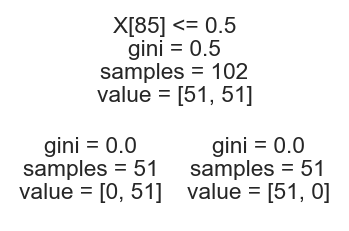

In [87]:
tree.plot_tree(model)

In [88]:
param_dist = {
    "criterion" : ['gini', 'entropy'],
    "max_depth" : [1,2,3,4,5,6,7,None]
}

In [89]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, param_grid=param_dist, cv=10, n_jobs=1)

In [90]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]},
  

In [91]:
grid.best_estimator_                                
# Max depth- 3, criterion- gini

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [92]:
grid.best_score_

1.0

In [93]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [94]:
y_pred_test11 = grid.predict(X_test)

In [95]:
from sklearn.metrics import accuracy_score
print('Accuracy Score for Test Data is:', accuracy_score(y_test, y_pred_test11))

Accuracy Score for Test Data is: 1.0


In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)

tree_para = [{'criterion': ['gini', 'entropy'], 'max_depth': range(2,60), 'max_features': ['sqrt', 'log2', None]}]

grid_search = GridSearchCV(decision_tree_classifier, tree_para, cv=10, refit='AUC')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
             

In [97]:
y_pred_test1 = grid_search.predict(X_test)

In [98]:
from sklearn.metrics import accuracy_score
print('Accuracy Score for Test Data is:', accuracy_score(y_test, y_pred_test1))

Accuracy Score for Test Data is: 1.0


In [99]:
### RANDOM FOREST CLASSIFIER

In [100]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 0)

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [101]:
model1 = RandomForestClassifier(random_state = 0,
                                n_estimators = 15,
                                min_samples_split = 2,
                                min_samples_leaf = 1)

model1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [102]:
y_pred_train = model.predict(X_train)
y_pred_train1 = model1.predict(X_train)

In [103]:
y_pred_test = model.predict(X_test)                                                # make predictions on the testing set
y_pred_test1 = model1.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,y_pred_test))
print('Accuracy score for test data using the model with parameter specification:', accuracy_score(y_test,y_pred_test1))

Accuracy score for test data using the model without parameter specification: 1.0
Accuracy score for test data using the model with parameter specification: 1.0
